In [1]:
import pandas as pd
import numpy as np

# Graphical presentation
from matplotlib import pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Imbalanced data
from imblearn.over_sampling import SMOTE

In [2]:




df = pd.read_csv('C:\\Users\\RIYAZROSHAN\\Desktop\\PAYsim project\\archive\\paysimdata.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
newdf = df.drop(columns = ["nameDest", "nameOrig"])
newdf.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

In [7]:
newdf.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [8]:
newdf["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
newdf['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
X = newdf.iloc[:,[0,2,3,4,5,6]]
Y = newdf.iloc[:,-2]

In [11]:
notFraud  = newdf[newdf['isFraud'] == 0]
notFraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [12]:
fraud = newdf[newdf['isFraud'] == 1]
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [13]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, train_size=0.8,  random_state=100)

In [14]:
Y_train.value_counts()

0    5083512
1       6584
Name: isFraud, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smt = SMOTE(k_neighbors=1)
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
Y_train_sm.value_counts()

0    5083512
1    5083512
Name: isFraud, dtype: int64

In [17]:
smt = SMOTE(k_neighbors=1)
X_test_sm, Y_test_sm = smt.fit_resample(X_test, Y_test)
Y_test_sm.value_counts()

0    1270895
1    1270895
Name: isFraud, dtype: int64

In [18]:
from sklearn import preprocessing
from sklearn import utils

model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 0.9982520958347347
[[1.00000000e+000 1.58666285e-132]
 [1.00000000e+000 1.35982740e-075]
 [1.00000000e+000 1.77907161e-141]
 ...
 [9.99325430e-001 6.74569864e-004]
 [9.99999269e-001 7.31406209e-007]
 [9.84338568e-001 1.56614322e-002]]
Confusion Matrix
[[1269584    1311]
 [    925     704]]


In [19]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270895
           1       0.35      0.43      0.39      1629

    accuracy                           1.00   1272524
   macro avg       0.67      0.72      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



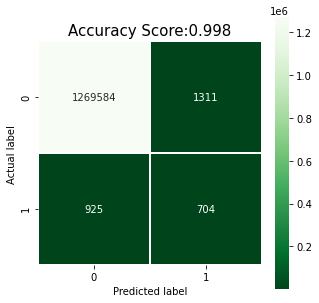

In [20]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

0.8852238344786195


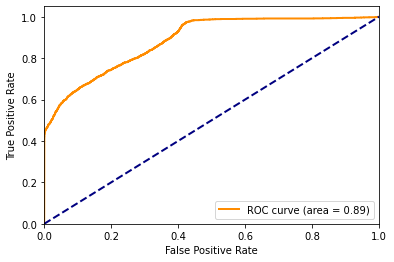

In [21]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [22]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


In [23]:
notFraud.shape

(6354407, 9)

In [24]:
fraud.shape

(8213, 9)

In [25]:
over = fraud.sample(n=6354407, replace = True)

In [26]:
over.shape

(6354407, 9)

In [27]:
over.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1509672,145,CASH_OUT,1767886.02,1767886.02,0.0,0.00,1767886.02,1,0
1059598,107,TRANSFER,1299860.86,1299860.86,0.0,0.00,0.00,1,0
1897149,165,CASH_OUT,1869237.83,1869237.83,0.0,472924.32,2342162.15,1,0
1603865,156,CASH_OUT,773696.12,773696.12,0.0,0.00,773696.12,1,0
6276624,639,TRANSFER,305846.12,305846.12,0.0,0.00,0.00,1,0


In [28]:
Over_df = pd.concat([notFraud,over])
Over_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [29]:
Over_df.shape

(12708814, 9)

In [30]:
Over_df_new = Over_df.sample(n=10000)

In [31]:
Over_df_new.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000
mean,305.911800,8.461947e+05,1.222487e+06,4.846309e+05,8.380059e+05,1.272085e+06,0.500300,0.000400
std,193.666452,1.915443e+06,3.133312e+06,2.354102e+06,3.543928e+06,3.976358e+06,0.500025,0.019997
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,160.000000,3.743530e+04,1.058250e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,1.749233e+05,1.159041e+05,0.000000e+00,0.000000e+00,1.124512e+05,1.000000,0.000000
75%,409.000000,5.378094e+05,7.912936e+05,0.000000e+00,4.831408e+05,1.046961e+06,1.000000,0.000000
max,743.000000,3.405129e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [32]:
Over_df_new.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.149030,0.065355,-0.045916,0.013474,0.042682,0.333731,0.013334
amount,0.149030,1.000000,0.653341,0.101986,0.016843,0.268228,0.344047,0.044066
oldbalanceOrg,0.065355,0.653341,1.000000,0.800493,0.012358,0.123104,0.139919,0.036214
newbalanceOrig,-0.045916,0.101986,0.800493,1.000000,0.049710,0.015999,-0.137064,0.054470
oldbalanceDest,0.013474,0.016843,0.012358,0.049710,1.000000,0.925307,-0.068495,-0.004730
newbalanceDest,0.042682,0.268228,0.123104,0.015999,0.925307,1.000000,0.013557,-0.006400
isFraud,0.333731,0.344047,0.139919,-0.137064,-0.068495,0.013557,1.000000,0.019992
isFlaggedFraud,0.013334,0.044066,0.036214,0.054470,-0.004730,-0.006400,0.019992,1.000000


In [33]:
Over_df_new.cov()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,3.750669e+04,5.528361e+07,3.965861e+07,-2.093338e+07,9.247443e+06,3.286915e+07,32.317858,0.051640
amount,5.528361e+07,3.668923e+12,3.921145e+12,4.598679e+11,1.143331e+11,2.042958e+12,329517.600477,1687.856957
oldbalanceOrg,3.965861e+07,3.921145e+12,9.817647e+12,5.904545e+12,1.372280e+11,1.533769e+12,219215.417684,2269.023733
newbalanceOrig,-2.093338e+07,4.598679e+11,5.904545e+12,5.541797e+12,4.147155e+11,1.497665e+11,-161339.192602,2564.195599
oldbalanceDest,9.247443e+06,1.143331e+11,1.372280e+11,4.147155e+11,1.255942e+13,1.303935e+13,-121376.845839,-335.235869
newbalanceDest,3.286915e+07,2.042958e+12,1.533769e+12,1.497665e+11,1.303935e+13,1.581143e+13,26956.000142,-508.885002
isFraud,3.231786e+01,3.295176e+05,2.192154e+05,-1.613392e+05,-1.213768e+05,2.695600e+04,0.250025,0.000200
isFlaggedFraud,5.164044e-02,1.687857e+03,2.269024e+03,2.564196e+03,-3.352359e+02,-5.088850e+02,0.000200,0.000400


In [34]:
Over_df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1512306,153,CASH_OUT,234853.95,234853.95,0.00,23261.50,258115.45,1,0
5614461,395,CASH_OUT,500949.16,36893.00,0.00,0.00,500949.16,0,0
450065,19,PAYMENT,15115.50,0.00,0.00,0.00,0.00,0,0
4381424,311,CASH_OUT,130134.39,1806.00,0.00,31079.97,161214.36,0,0
5020057,353,PAYMENT,3468.91,188.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6351237,703,TRANSFER,13024.95,13024.95,0.00,0.00,0.00,1,0
895398,42,CASH_IN,92826.52,834849.34,927675.85,136884.25,44057.74,0,0
5988234,414,CASH_OUT,216000.95,216000.95,0.00,171773.03,387773.97,1,0
943788,43,CASH_IN,60125.76,229023.97,289149.73,586395.31,166249.19,0,0


In [35]:
X = Over_df_new.iloc[:,[0,2,3,4,5,6]]
Y = Over_df_new.iloc[:,-2]

In [36]:
from sklearn.model_selection import cross_val_score,train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, train_size=0.8,  random_state=100)

In [37]:
from sklearn import preprocessing
from sklearn import utils

model = LogisticRegression()
print(model)

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
print(probability)
#print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

LogisticRegression()
model score:: 0.920125
[[2.75389839e-01 7.24610161e-01]
 [9.49866018e-01 5.01339822e-02]
 [1.07707711e-02 9.89229229e-01]
 ...
 [7.04485600e-01 2.95514400e-01]
 [6.01974041e-01 3.98025959e-01]
 [1.00000000e+00 2.42274164e-12]]
Confusion Matrix
[[956  81]
 [ 79 884]]


In [38]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1037
           1       0.92      0.92      0.92       963

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



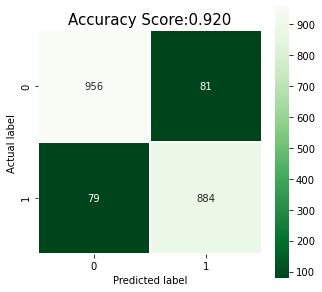

In [39]:
import seaborn as sns
cm = metrics.confusion_matrix(Y_test , predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

0.9690175850739662


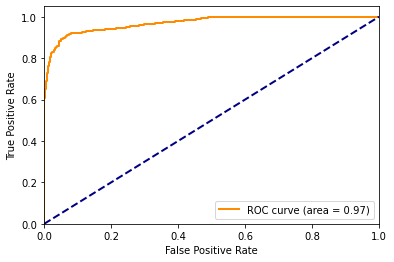

In [40]:
from sklearn import metrics
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.auc(fpr,tpr)
print(auc)
plt.figure()
fpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import svm
C = 1.0 # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
#####################################
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
#print(x_min, x_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow_r, alpha=0.6)
###################################
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()